In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import ast
import matplotlib.colors

# DATA

In [2]:
# Darks
FitsDarks1 = fits.open('/Volumes/FOXSI-R_B/FOXSI-3_2017Sep17/X2/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_darks1.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/FOXSI-R_B/FOXSI-3_2017Sep17/X2/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_darks2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
Darks = (Darks1 + Darks2)*0.5
X0 = 886*0.0225
Y0 = 182*0.0225
scale = 46.08

# SIMULATION

In [3]:
## Reading Rays
import matplotlib.pyplot as plt
from foxsisim.util import load_rays
from foxsisim.plotting import plot,scatterHist
Rrays = load_rays('/Users/Kamilobu/Desktop/MakeRays/14arcmin/run00.csv')
print('Number of rays : {:d}'.format(len(Rrays)))
Drays = [ray for ray in Rrays if (ray.des[2]==230.0 and ray.bounces ==2 )]
Srays = [ray for ray in Rrays if (ray.des[2]==230.0 and ray.bounces ==1 )]
Hrays = [ray for ray in Rrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.hist[2] >= 30 )]
Prays = [ray for ray in Rrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.hist[2] <= 30 )]

sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)

# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)

Rays from /Users/Kamilobu/Desktop/MakeRays/14arcmin/run00.csv loaded.
Number of rays : 100000


## Hyperboloids on top

(-18, 28)

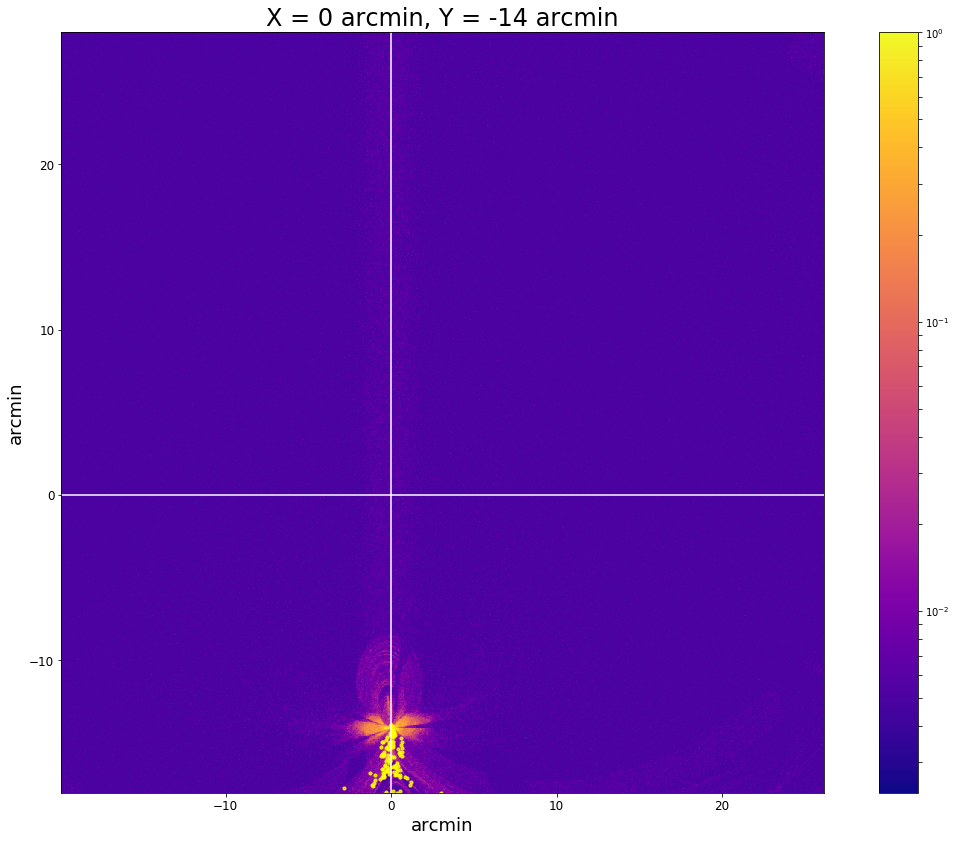

In [7]:
X = 0
Y = -14
F_X0_Ym22 = fits.open('/Volumes/FOXSI-R_B/FOXSI-3_2017Sep17/X2/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p1mA_0arcminX_-14arcminY.fits')
D_X0_Ym22 = np.average(F_X0_Ym22[0].data, axis=0)

fig = plt.figure(figsize=(20,14))
plt.title('X = 0 arcmin, Y = -14 arcmin',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.imshow((D_X0_Ym22-Darks)/(D_X0_Ym22-Darks).max()+5e-3, origin='lower',cmap='plasma', 
           norm=matplotlib.colors.LogNorm(),extent=[-X0+X,scale-X0+X,-Y0+Y,scale-Y0+Y])
plt.axvline(x=0.0,color='white')
plt.axhline(y=0.0,color='white')
plt.colorbar()
plt.scatter(Hx,Hy,color='yellow',s=10.0,alpha=0.8)
#plt.savefig("plots/0arcminX_-26arcminY.png",transparent=True,pad_inches=0.0)
plt.ylim(-18,28)

## Paraboloids on top

(-18, 28)

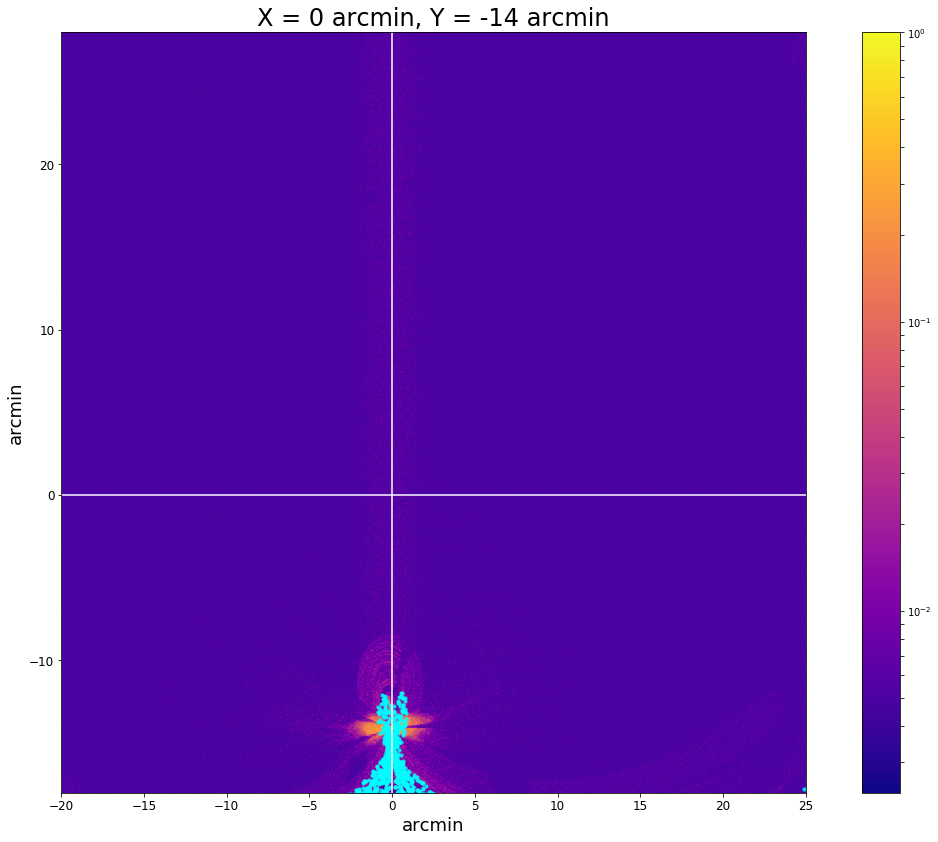

In [10]:
X = 0
Y = -14
F_X0_Ym22 = fits.open('/Volumes/FOXSI-R_B/FOXSI-3_2017Sep17/X2/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p1mA_0arcminX_-14arcminY.fits')
D_X0_Ym22 = np.average(F_X0_Ym22[0].data, axis=0)

fig = plt.figure(figsize=(20,14))
plt.title('X = 0 arcmin, Y = -14 arcmin',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.imshow((D_X0_Ym22-Darks)/(D_X0_Ym22-Darks).max()+5e-3, origin='lower',cmap='plasma', 
           norm=matplotlib.colors.LogNorm(),extent=[-X0+X,scale-X0+X,-Y0+Y,scale-Y0+Y])
plt.axvline(x=0.0,color='white')
plt.axhline(y=0.0,color='white')
plt.colorbar()
plt.scatter(Px,Py,color='cyan',s=10.0,alpha=0.8)
plt.xlim(-20,25)
plt.ylim(-18,28)

## Double bounces on top

(-18, 28)

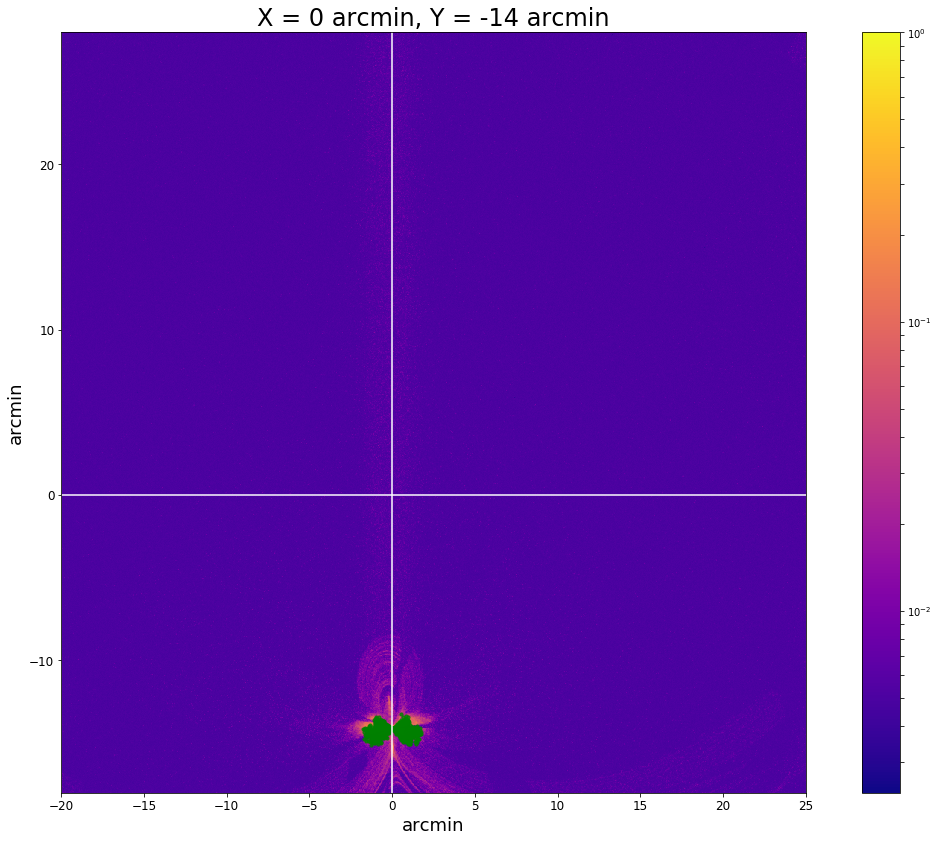

In [13]:
X = 0
Y = -14
F_X0_Ym22 = fits.open('/Volumes/FOXSI-R_B/FOXSI-3_2017Sep17/X2/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p1mA_0arcminX_-14arcminY.fits')
D_X0_Ym22 = np.average(F_X0_Ym22[0].data, axis=0)

fig = plt.figure(figsize=(20,14))
plt.title('X = 0 arcmin, Y = -14 arcmin',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.imshow((D_X0_Ym22-Darks)/(D_X0_Ym22-Darks).max()+5e-3, origin='lower',cmap='plasma', 
           norm=matplotlib.colors.LogNorm(),extent=[-X0+X,scale-X0+X,-Y0+Y,scale-Y0+Y])
plt.axvline(x=0.0,color='white')
plt.axhline(y=0.0,color='white')
plt.colorbar()
plt.scatter(Dx,Dy,color='green',s=10.0,alpha=0.8)
plt.xlim(-20,25)
plt.ylim(-18,28)

## All together on top

(-18, 28)

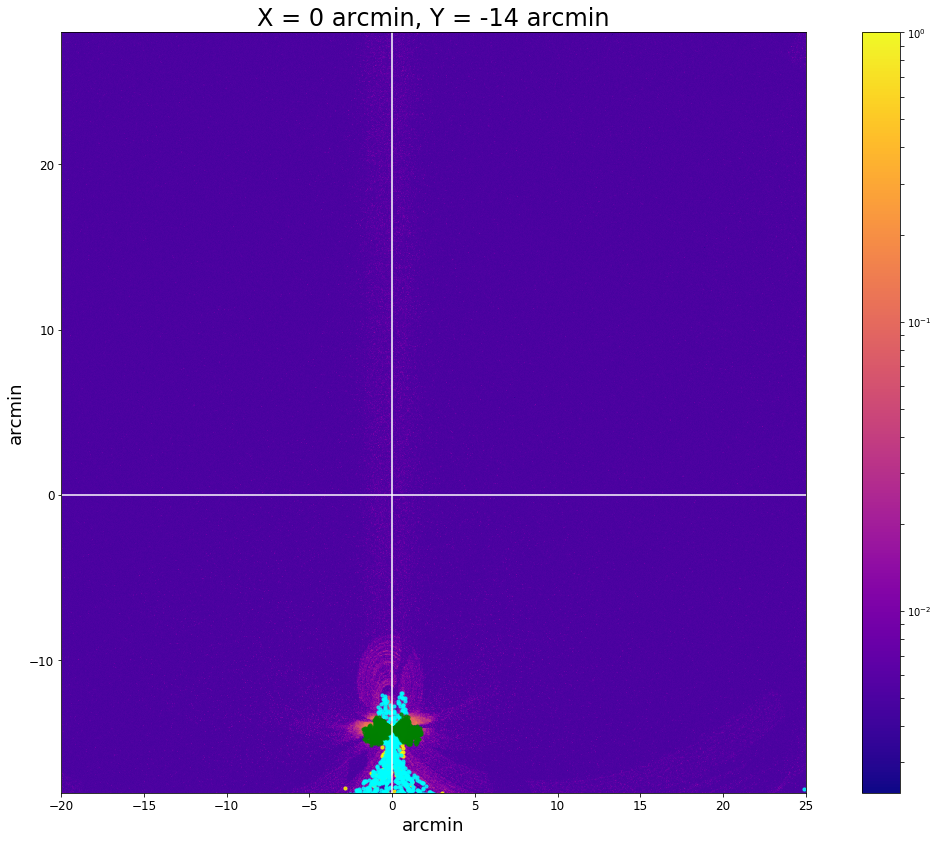

In [15]:
X = 0
Y = -14
F_X0_Ym22 = fits.open('/Volumes/FOXSI-R_B/FOXSI-3_2017Sep17/X2/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p1mA_0arcminX_-14arcminY.fits')
D_X0_Ym22 = np.average(F_X0_Ym22[0].data, axis=0)

fig = plt.figure(figsize=(20,14))
plt.title('X = 0 arcmin, Y = -14 arcmin',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.imshow((D_X0_Ym22-Darks)/(D_X0_Ym22-Darks).max()+5e-3, origin='lower',cmap='plasma', 
           norm=matplotlib.colors.LogNorm(),extent=[-X0+X,scale-X0+X,-Y0+Y,scale-Y0+Y])
plt.axvline(x=0.0,color='white')
plt.axhline(y=0.0,color='white')
plt.colorbar()
plt.scatter(Hx,Hy,color='yellow',s=10.0,alpha=0.8)
plt.scatter(Px,Py,color='cyan',s=10.0,alpha=0.8)
plt.scatter(Dx,Dy,color='green',s=10.0,alpha=0.8)
plt.xlim(-20,25)
plt.ylim(-18,28)